# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# needed to look up how to find duplicate values based on data in two columns, link below:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
dup_mouse = merged_data.loc[merged_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
only_dup = merged_data.loc[merged_data["Mouse ID"] == dup_mouse[0],:]
only_dup

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data.loc[merged_data["Mouse ID"] != dup_mouse[0],:]
cleaned_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_groupby = cleaned_df.groupby(["Drug Regimen"])
mean_tumor_vol = drug_groupby["Tumor Volume (mm3)"].mean()
median_tumor_vol = drug_groupby["Tumor Volume (mm3)"].median()
variance_tumor_vol = drug_groupby["Tumor Volume (mm3)"].var()
stdev_tumor_vol = drug_groupby["Tumor Volume (mm3)"].std()
sem_tumor_vol = drug_groupby["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": variance_tumor_vol,
    "Tumor Volume Std. Dev.": stdev_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol
})

summary_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# found the aggregate code here: https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/#
drug_groupby["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

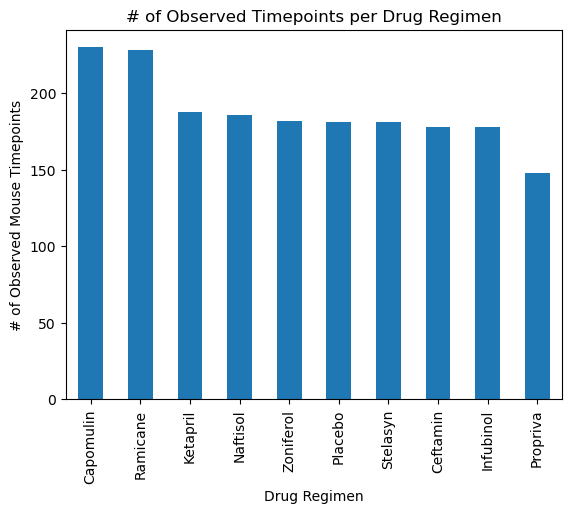

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_vs_drug = pd.DataFrame(drug_groupby["Timepoint"].count())
time_vs_drug = time_vs_drug.sort_values("Timepoint",ascending=False)
time_vs_drug.plot(kind="bar", legend=False, title = "# of Observed Timepoints per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

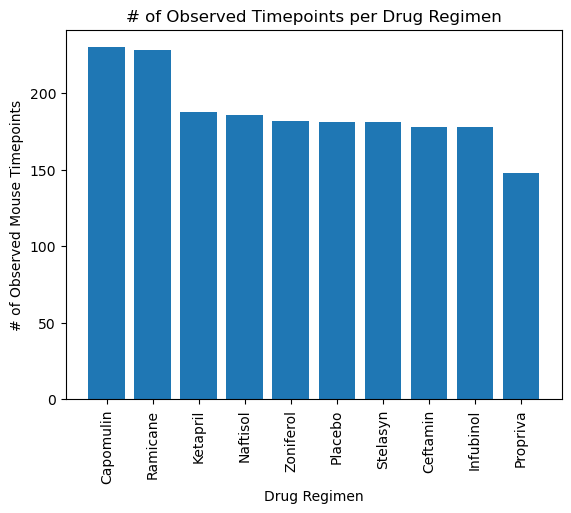

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Rotating xlabels code found here: https://www.pythoncharts.com/matplotlib/rotating-axis-labels/#:~:text=Option%201%3A%20plt.&text=xticks()-,plt.,way%20to%20rotate%20your%20labels.
x_axis = time_vs_drug.index.values
y_axis = time_vs_drug["Timepoint"]
plt.bar(x_axis, y_axis)
plt.title("# of Observed Timepoints per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

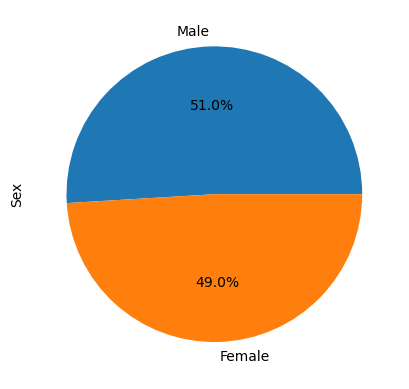

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = pd.DataFrame(cleaned_df["Sex"].value_counts())
mouse_sex = mouse_sex.rename(columns={"count": "Sex"})
mouse_sex.plot(y="Sex",kind="pie", autopct="%1.1f%%", legend=False)
plt.show()

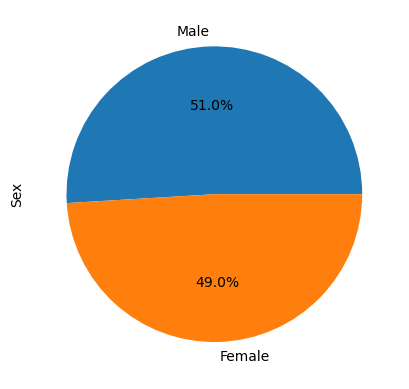

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"]
plt.pie(mouse_sex["Sex"], labels = mouse_sex.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin"), :]
greatest_tp = regimen_df.groupby(["Mouse ID"]).max()
greatest_tp = greatest_tp[["Timepoint"]]
merged_drug_df = pd.merge(greatest_tp, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
merged_drug_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_drug_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1   Female          21          25  
2   Female          20          28  
3     Male           3          22  
4   Female          10          25  
..     ...         ...         ...  
95  Female           6          27  
96    Male          17          17  
97    Male          23          26  
98    Male          11          16  
99  Female          24          25  

[100 rows x 8 columns]

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_drug_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_data = merged_drug_df.loc[(merged_drug_df['Tumor Volume (mm3)'] < lower_bound) | (merged_drug_df['Tumor Volume (mm3)'] > upper_bound)]

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drug_df = merged_drug_df.loc[(merged_drug_df["Drug Regimen"] == treatment), :]
    tumor_data = drug_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_data)
    
    # add subset 
    quartiles = tumor_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr2 = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr2)
    upper_bound = upperq + (1.5*iqr2)
    
    # Determine outliers using upper and lower bounds
    outlier_data = drug_df.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | (drug_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"IQR for {treatment} = {iqr2}")
    print(f"Outlier Data for {treatment}: {outlier_data}")

IQR for Capomulin = 7.781863460000004
Outlier Data for Capomulin: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
IQR for Ramicane = 9.098536719999998
Outlier Data for Ramicane: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
IQR for Infubinol = 11.477135160000003
Outlier Data for Infubinol:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
IQR for Ceftamin = 15.577752179999997
Outlier Data for Ceftamin: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


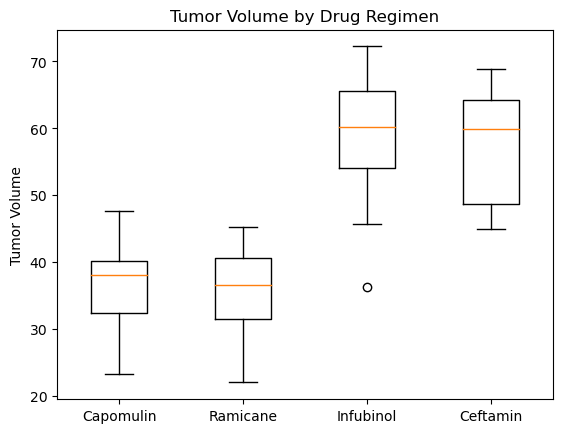

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

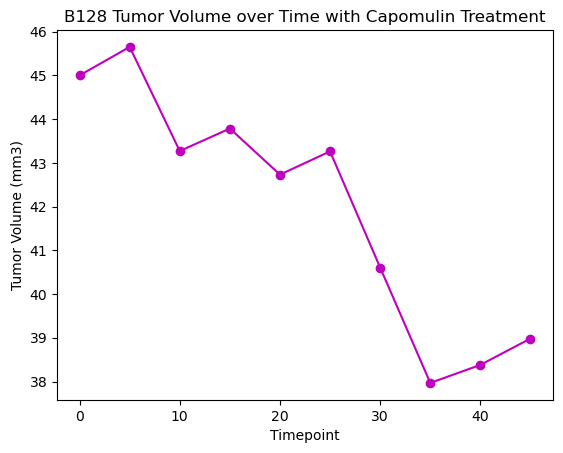

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_b128_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "b128"), :]
x_axis = capomulin_b128_df["Timepoint"]
y_axis = capomulin_b128_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="o", color="m")
plt.title("B128 Tumor Volume over Time with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

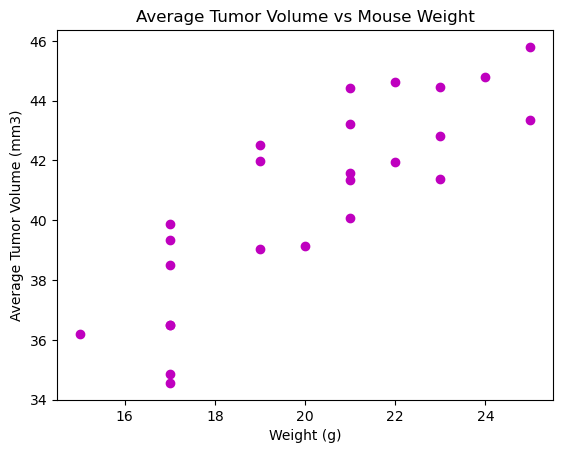

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
cap_data_by_mouse = capomulin_data.groupby(["Mouse ID"])
average_tumor_vol = cap_data_by_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = cap_data_by_mouse["Weight (g)"].mean()
x_axis = mouse_weight
y_axis = average_tumor_vol
plt.scatter(x_axis, y_axis, marker="o", facecolors="m")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between Mouse Weight and Avg Tumor Volume is 0.84
Linear Regression for Mouse Weight and Avg Tumor Volume: y = 0.95x + 21.55


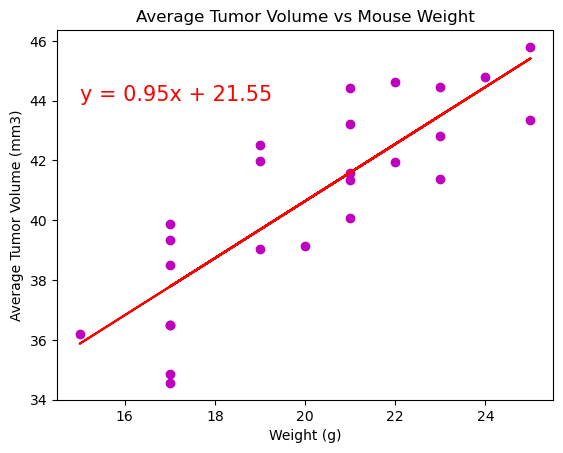

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between Mouse Weight and Avg Tumor Volume is {round(correlation[0],2)}")
print(f"Linear Regression for Mouse Weight and Avg Tumor Volume: {line_eq}")

#replot the data along with the linear regression model
x_axis = mouse_weight
y_axis = average_tumor_vol
plt.scatter(x_axis, y_axis, marker="o", facecolors="m")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()